In [3]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from xgcm import Grid

In [4]:
# ds_seq2_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2/cont__4208_045.nc", decode_times=False)
ds_seq2_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2_new/cont__4911_274.nc", decode_times=False)
ds_seq3_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq3/cont__5607_060.nc", decode_times=False)
ds_seq0_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq0/cont__5308_170.nc", decode_times=False)
ds_scurl0_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq4/cont__5607_060.nc", decode_times=False)

ds_eq2_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq2/cont__4303_021.nc", decode_times=False)
ds_eq3_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq3/cont__3208_295.nc", decode_times=False)
ds_eq0_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq0/cont__3023_341.nc", decode_times=False)
ds_curl0_cont = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/eq4/new/cont__4208_045.nc", decode_times=False)

ds_seq2 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2_new/linear_d2_cont__4911_274.nc", decode_times=False)
ds_seq3 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq3/linear_d2_cont__5607_060.nc", decode_times=False)
ds_seq0 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq0/linear_d2_cont__5308_170.nc", decode_times=False)
ds_scurl0 = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq4/linear_d2_cont__5607_060.nc", decode_times=False)

ds_seq0_p = xr.open_dataset("/media/sanjana/T7 Shield/Vortex/executable/seq2_new/linear_d2_prog__4318_017.nc", decode_times=False)


In [5]:
ds_stats1 = xr.open_dataset('/media/sanjana/T7 Shield/Code/with_precip/ocean_geometry.nc', decode_times=False)
ds_stats1 = ds_stats1.rename({'lath' : 'yh','lonh' : 'xh','latq' : 'yq','lonq' : 'xq'}) #renaming the coords to align with the original dataset
grid1 = Grid(ds_seq0_p, coords= {'X':{'center':'xh','outer':'xq'}, 'Y':{'center':'yh','outer':'yq'}, 'Z':{'center':'zl','outer':'zi'}},periodic=['X'])

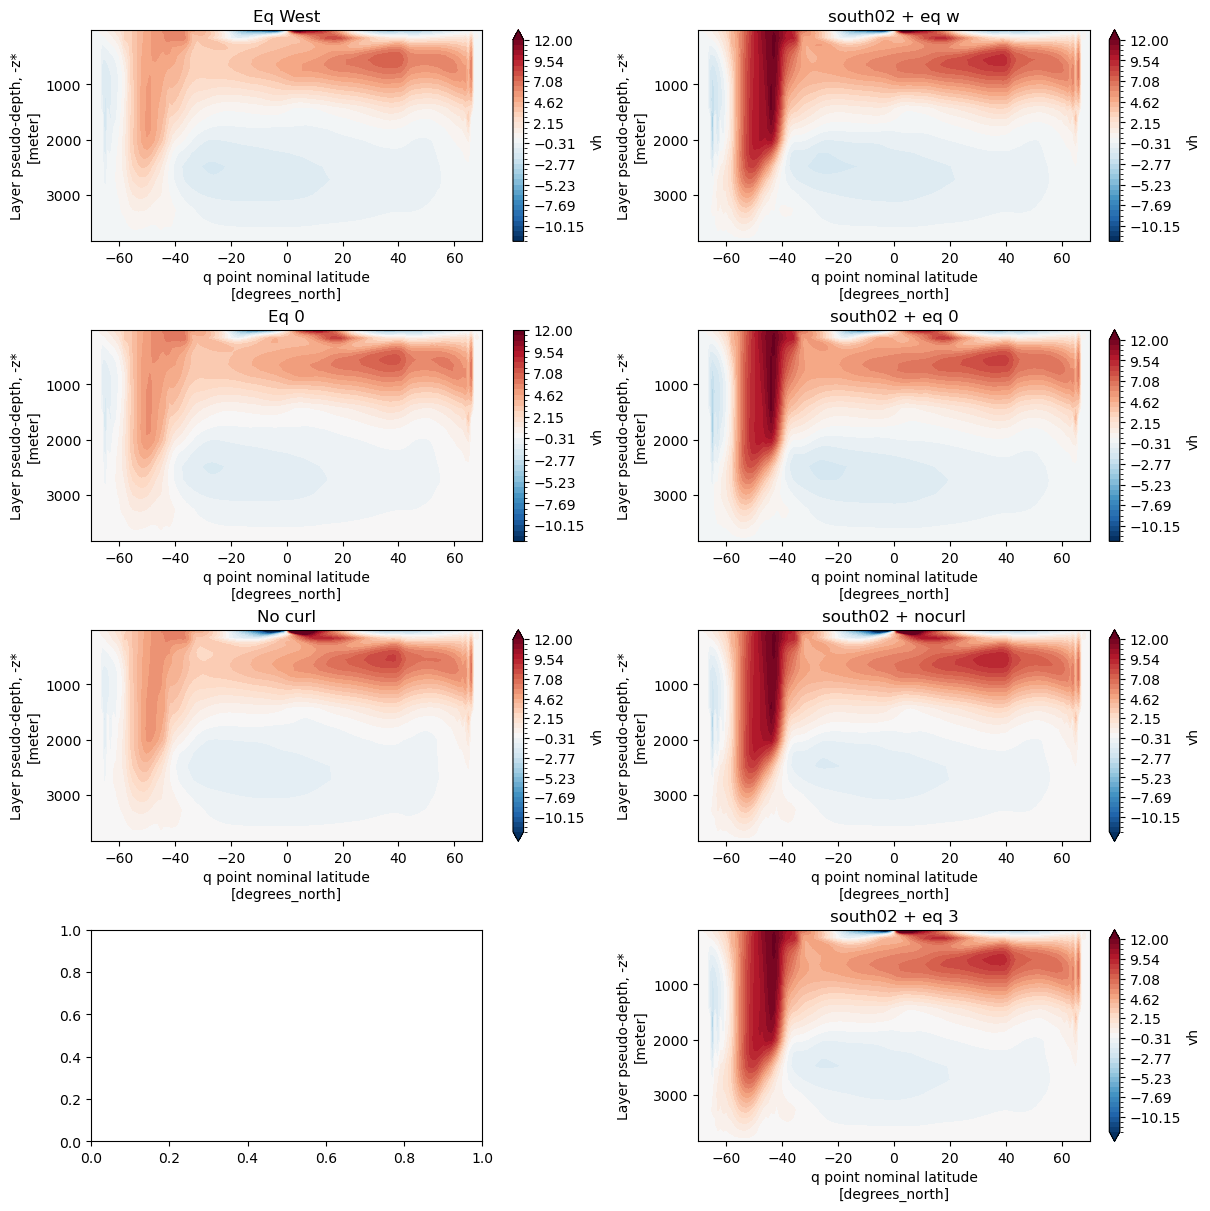

In [4]:
fig,ax=plt.subplots(nrows=4,ncols=2, constrained_layout=True,figsize=(12,12))
(((ds_eqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,0],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_eq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[1,0],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_curl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[2,0],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,1],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[1,1],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[2,1],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[3,1],levels=40,cmap = 'RdBu_r',vmax=12)

ax[0,0].set_title("Eq West")
ax[1,0].set_title("Eq 0")
ax[2,0].set_title("No curl")
ax[0,1].set_title("south02 + eq w")
ax[1,1].set_title("south02 + eq 0")
ax[2,1].set_title("south02 + nocurl")
ax[3,1].set_title("south02 + eq 3")

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[2,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()
ax[2,1].invert_yaxis()
ax[3,1].invert_yaxis()



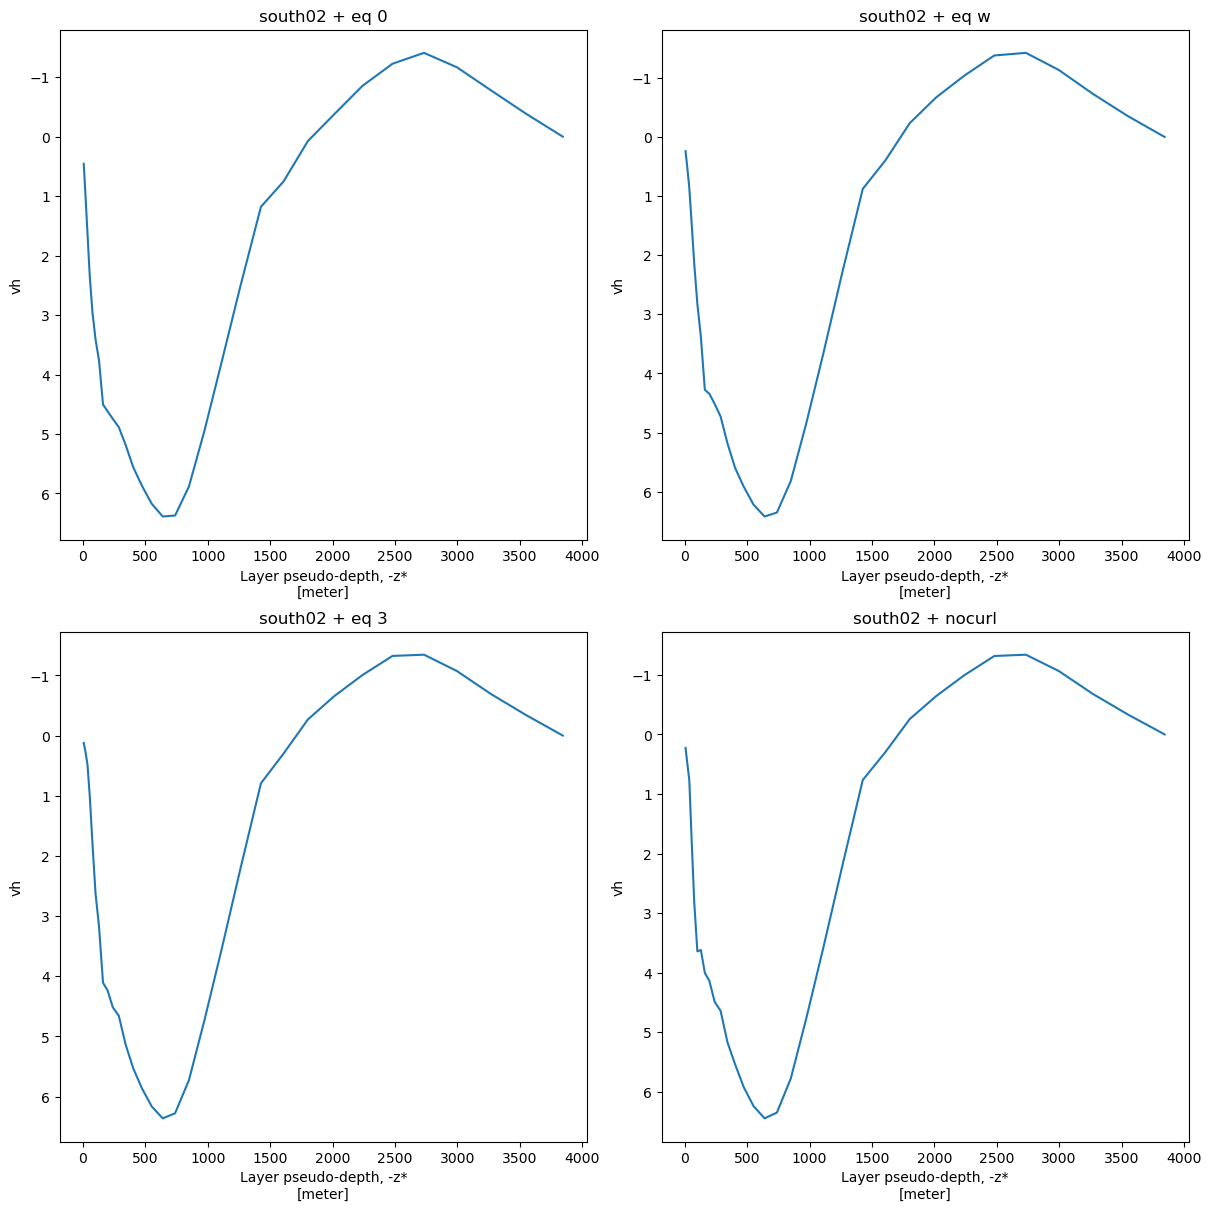

In [5]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,12))
(((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).isel(yq=70).plot(ax=ax[0,1])
(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).isel(yq=70).plot(ax=ax[0,0])
(((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).isel(yq=70).plot(ax=ax[1,1])
(((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).isel(yq=70).plot(ax=ax[1,0])

ax[0,0].set_title("south02 + eq 0")
ax[0,1].set_title("south02 + eq w")
ax[1,1].set_title("south02 + nocurl")
ax[1,0].set_title("south02 + eq 3")

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

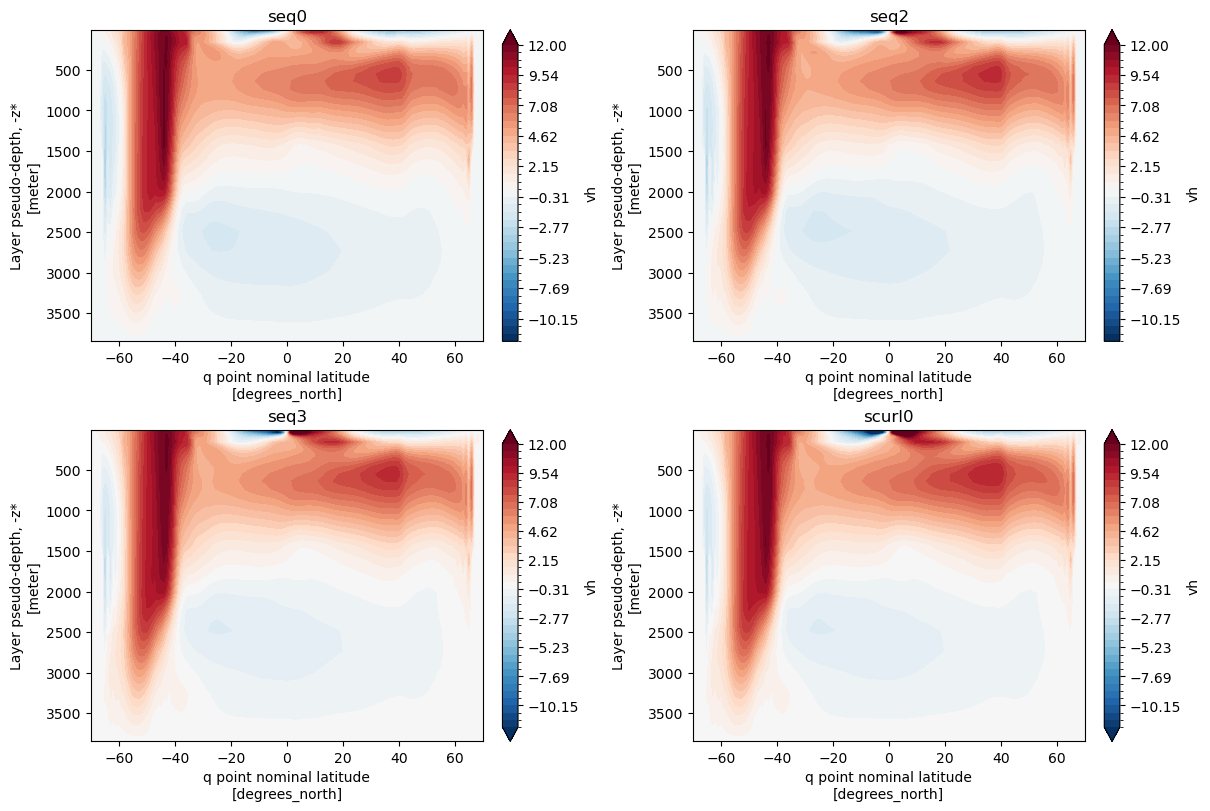

In [6]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,8))
(((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,0], levels=40, cmap='RdBu_r', vmax=12)
(((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[0,1], levels=40, cmap='RdBu_r', vmax=12)
(((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[1,0], levels=40, cmap='RdBu_r', vmax=12)
(((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))*10**-6).plot.contourf(ax=ax[1,1], levels=40, cmap='RdBu_r', vmax=12)

ax[0,0].set_title("seq0")
ax[0,1].set_title("seq2")
ax[1,1].set_title("scurl0")
ax[1,0].set_title("seq3")



ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

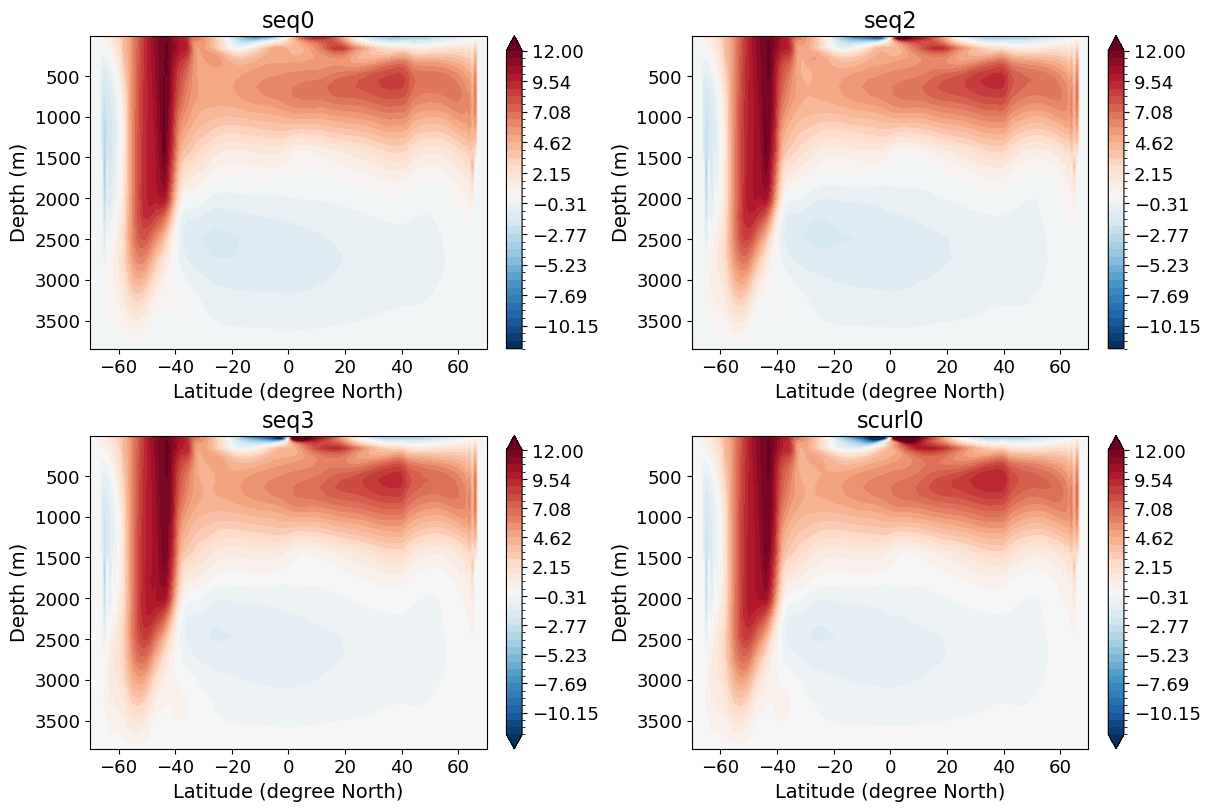

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

# Define datasets for easier plotting
datasets = [ds_seq0_prog, ds_seqw_prog, ds_seq3_prog, ds_scurl0_prog]
titles = ["seq0", "seq2", "seq3", "scurl0"]

# Loop through axes and datasets
for i, axis in enumerate(ax.flat):
    contour = (((datasets[i].vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6).plot.contourf(
        ax=axis, levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
    )
    axis.set_title(titles[i], fontsize=16)
    axis.set_xlabel('Latitude (degree North)', fontsize=14)
    axis.set_ylabel('Depth (m)', fontsize=14)
    axis.tick_params(axis='both', labelsize=13)
    axis.invert_yaxis()
    
    # Add colorbars with custom fontsize
    cbar = fig.colorbar(contour, ax=axis, orientation='vertical')
    cbar.ax.tick_params(labelsize=13)
    cbar.ax.set_label('Volume Transport (Sv)')

plt.show()


NameError: name 'contours' is not defined

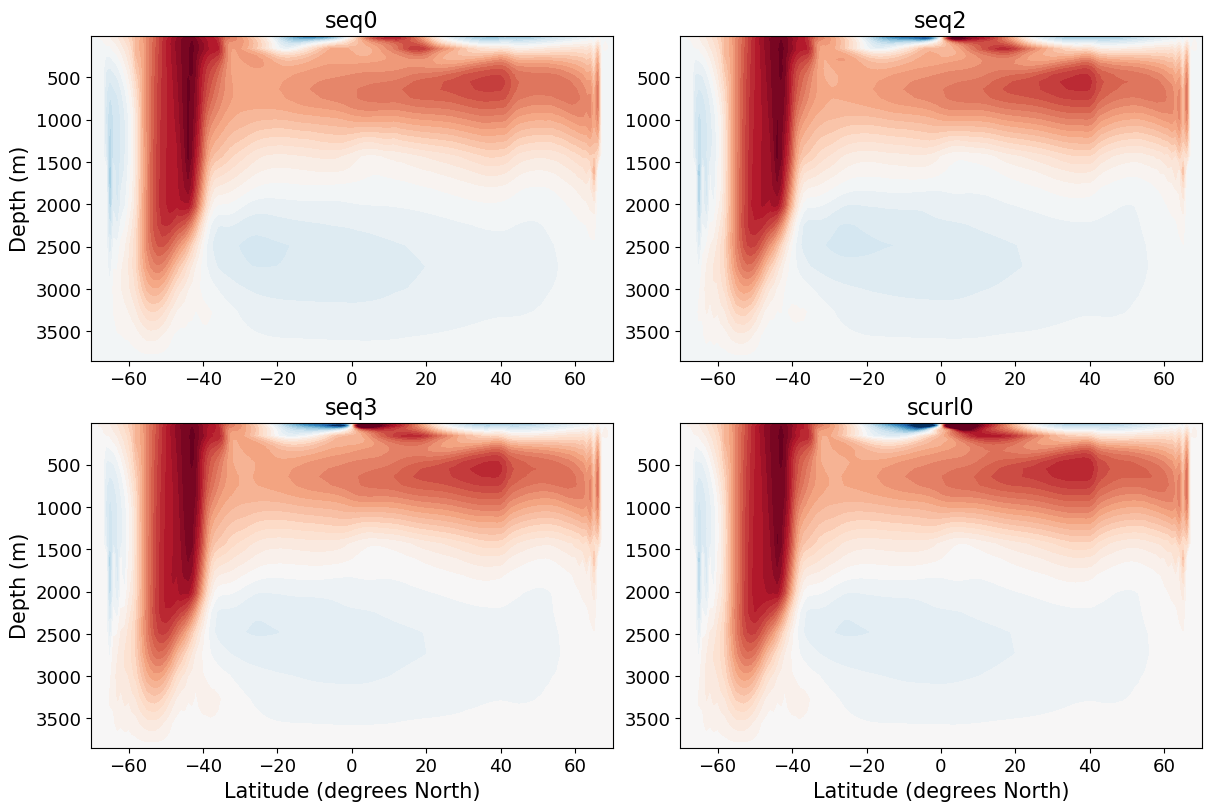

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

# Plot data
contour0 = (((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6).plot.contourf(
    ax=ax[0, 0], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)
contour1 = (((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6).plot.contourf(
    ax=ax[0, 1], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)
contour2 = (((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6).plot.contourf(
    ax=ax[1, 0], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)
contour3 = (((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6).plot.contourf(
    ax=ax[1, 1], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)

# Set titles
ax[0, 0].set_title("seq0", fontsize =16)
ax[0, 1].set_title("seq2", fontsize =16)
ax[1, 1].set_title("scurl0", fontsize =16)
ax[1, 0].set_title("seq3", fontsize =16)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Depth (m)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Depth (m)", fontsize = 15)
ax[1,1].set_ylabel('')

# Invert y-axes
ax[0, 0].invert_yaxis()
ax[1, 0].invert_yaxis()
ax[0, 1].invert_yaxis()
ax[1, 1].invert_yaxis()

# Add a common colorbar
cbar = fig.colorbar(contours[0], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Volume Transport (Sv)', fontsize=15)  # Set the colorbar title

plt.show()

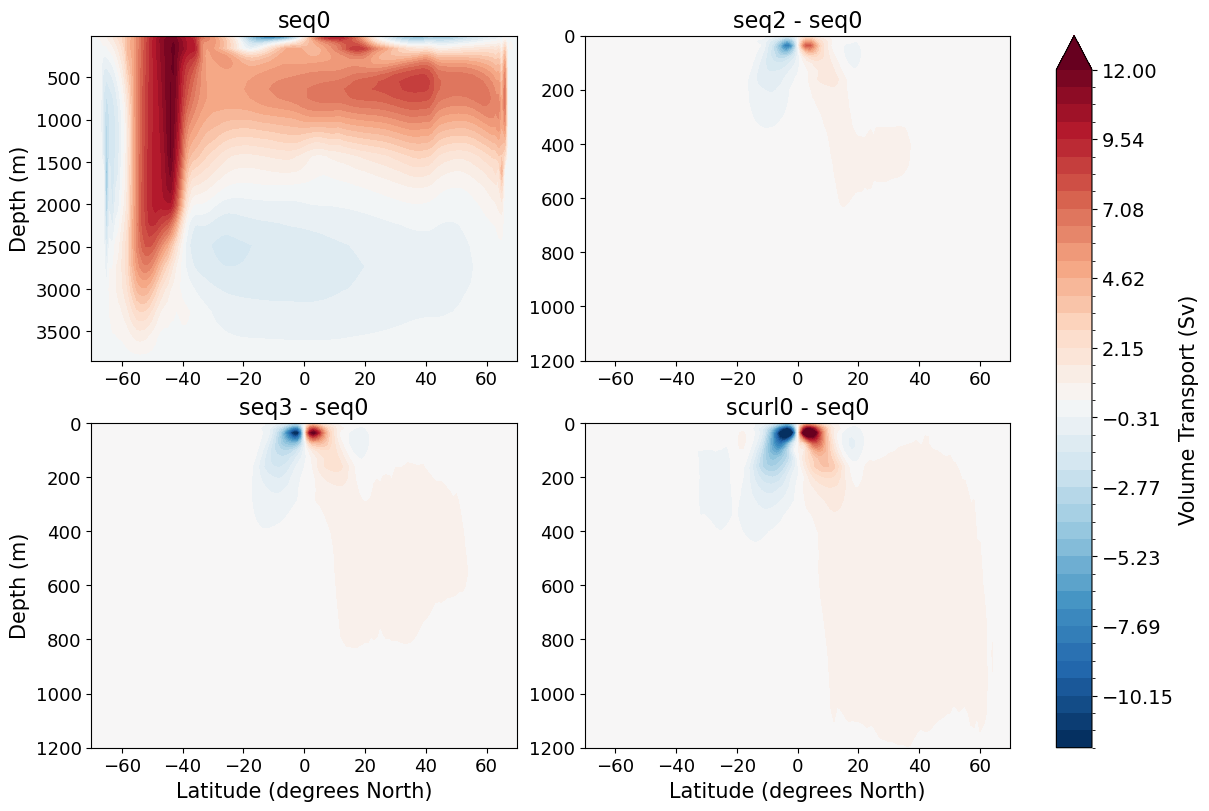

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

# Plot data
contour0 = (((ds_seq0.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6).plot.contourf(
    ax=ax[0, 0], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)
contour1 = ((((ds_seq2.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6) - (((ds_seq0.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6)).plot.contourf(
    ax=ax[0, 1], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)
contour2 = ((((ds_seq3.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6) - (((ds_seq0.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6)).plot.contourf(
    ax=ax[1, 0], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)
contour3 = ((((ds_scurl0.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6) - (((ds_seq0.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6)).plot.contourf(
    ax=ax[1, 1], levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
)

contours=[contour0,contour1,contour2,contour3]
# Set titles
ax[0, 0].set_title("seq0", fontsize =16)
ax[0, 1].set_title("seq2 - seq0", fontsize =16)
ax[1, 1].set_title("scurl0 - seq0", fontsize =16)
ax[1, 0].set_title("seq3 - seq0", fontsize =16)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Depth (m)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Depth (m)", fontsize = 15)
ax[1,1].set_ylabel('')

# Invert y-axes
ax[0, 0].invert_yaxis()
ax[1, 0].invert_yaxis()
ax[0, 1].invert_yaxis()
ax[1, 1].invert_yaxis()

ax[1, 0].set_ylim(1200,0)
ax[0, 1].set_ylim(1200,0)
ax[1, 1].set_ylim(1200,0)

# Add a common colorbar
cbar = fig.colorbar(contours[0], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Volume Transport (Sv)', fontsize=15)  # Set the colorbar title

plt.savefig('fullstream.png')
plt.show()

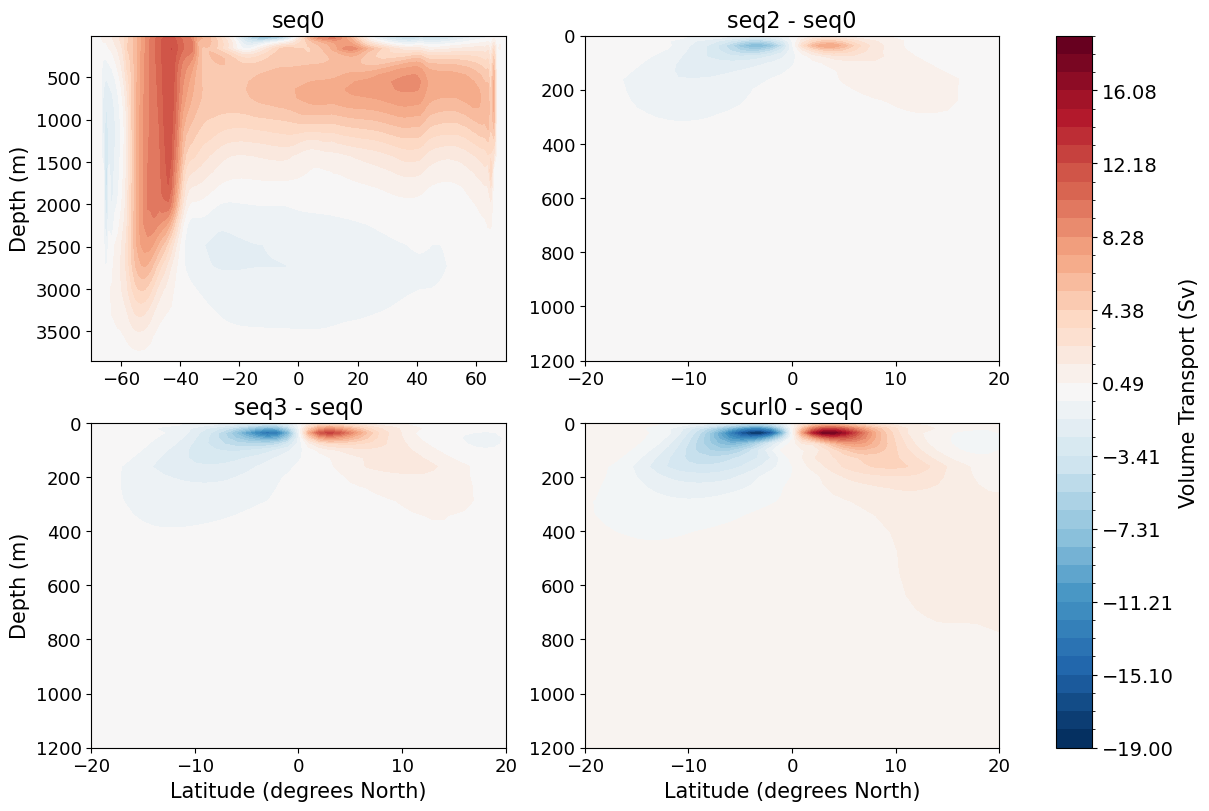

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

# Plot data
contour0 = (((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6).plot.contourf(
    ax=ax[0, 0], levels=40, cmap='RdBu_r', vmax=19, add_colorbar=False
)
contour1 = ((((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6) - (((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6)).plot.contourf(
    ax=ax[0, 1], levels=40, cmap='RdBu_r', vmax=19, add_colorbar=False
)
contour2 = ((((ds_seq3_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6) - (((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6)).plot.contourf(
    ax=ax[1, 0], levels=40, cmap='RdBu_r', vmax=19, add_colorbar=False
)
contour3 = ((((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6) - (((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6)).plot.contourf(
    ax=ax[1, 1], levels=40, cmap='RdBu_r', vmax=19, add_colorbar=False
)

contours=[contour0,contour1,contour2,contour3]
# Set titles
ax[0, 0].set_title("seq0", fontsize =16)
ax[0, 1].set_title("seq2 - seq0", fontsize =16)
ax[1, 1].set_title("scurl0 - seq0", fontsize =16)
ax[1, 0].set_title("seq3 - seq0", fontsize =16)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Depth (m)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Depth (m)", fontsize = 15)
ax[1,1].set_ylabel('')

# Invert y-axes
ax[0, 0].invert_yaxis()
ax[1, 0].invert_yaxis()
ax[0, 1].invert_yaxis()
ax[1, 1].invert_yaxis()

ax[1, 0].set_ylim(1200,0)
ax[0, 1].set_ylim(1200,0)
ax[1, 1].set_ylim(1200,0)

ax[1, 0].set_xlim(-20,20)
ax[0, 1].set_xlim(-20,20)
ax[1, 1].set_xlim(-20,20)

# Add a common colorbar
cbar = fig.colorbar(contours[0], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Volume Transport (Sv)', fontsize=15)  # Set the colorbar title

plt.show()

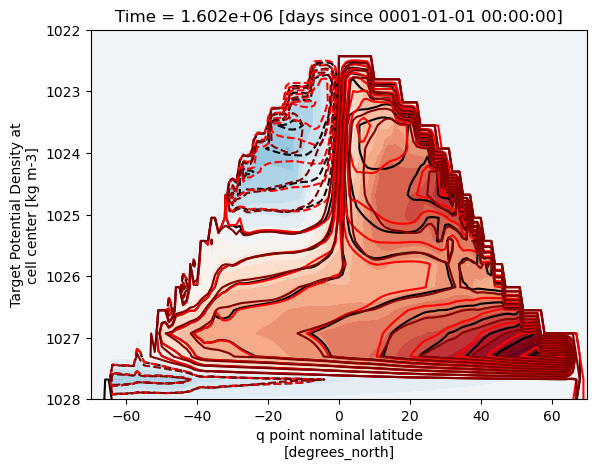

In [6]:
(((ds_seq0.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contourf(levels=30, cmap='RdBu_r', vmax=12, add_colorbar=False)
c=np.linspace(-12,12,1)
(((ds_seq3.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contour(levels=30, colors='black')
(((ds_scurl0.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contour(levels=30, colors='red')
(((ds_seq2.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contour(levels=30, colors='maroon')



plt.gca().invert_yaxis()
plt.gca().set_ylim(1028,1022)
plt.savefig("svdensity1.png")

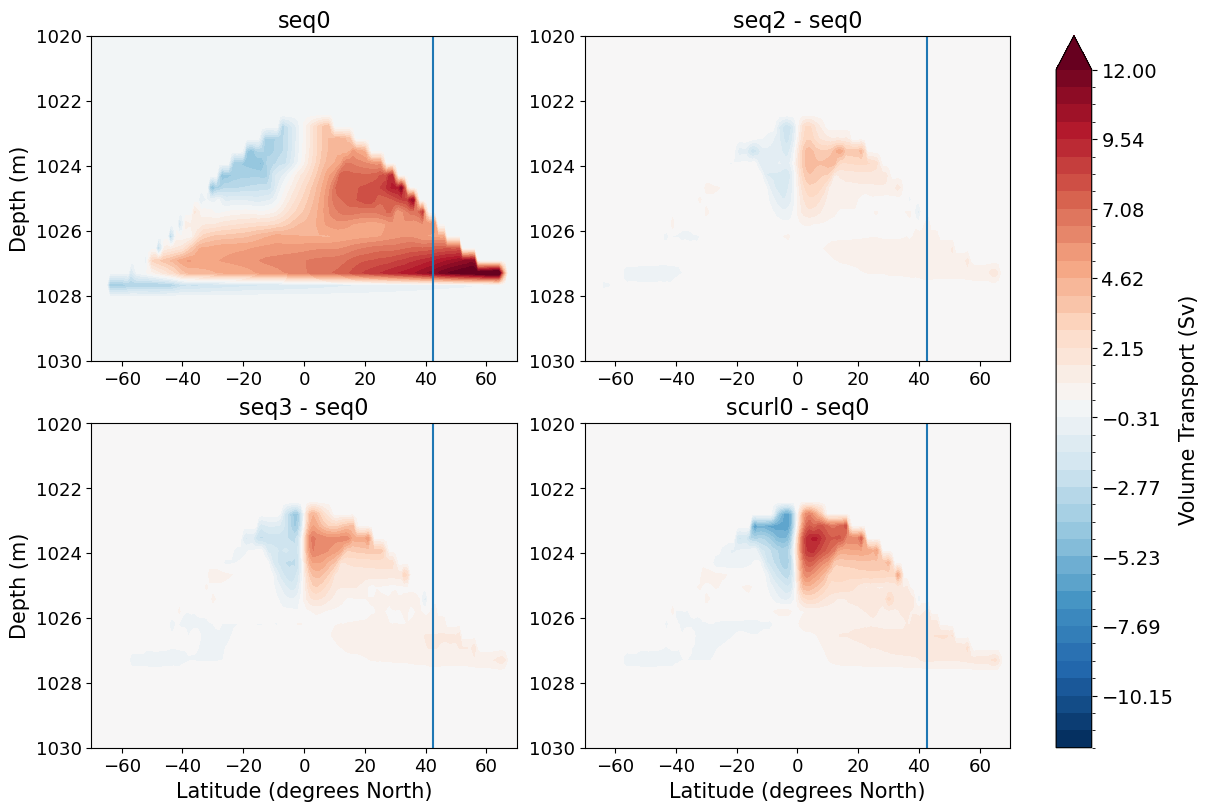

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

# Plot data
contour0 = (((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contourf(
    ax=ax[0, 0], levels=40, cmap='RdBu_r',add_colorbar=False, vmax=12
)
contour1 = ((((ds_seqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[0, 1], levels=40, cmap='RdBu_r', add_colorbar=False, vmax=12
)
contour2 = ((((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[1, 0], levels=40, cmap='RdBu_r', add_colorbar=False, vmax=12
)
contour3 = ((((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[1, 1], levels=40, cmap='RdBu_r',add_colorbar=False, vmax=12
)

contours=[contour0,contour1,contour2,contour3]

# Set titles
ax[0, 0].set_title("seq0", fontsize =16)
ax[0, 1].set_title("seq2 - seq0", fontsize =16)
ax[1, 1].set_title("scurl0 - seq0", fontsize =16)
ax[1, 0].set_title("seq3 - seq0", fontsize =16)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Depth (m)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Depth (m)", fontsize = 15)
ax[1,1].set_ylabel('')

# Invert y-axes
ax[0, 0].invert_yaxis()
ax[1, 0].invert_yaxis()
ax[0, 1].invert_yaxis()
ax[1, 1].invert_yaxis()

ax[0, 0].set_ylim(1030,1020)
ax[1, 0].set_ylim(1030,1020)
ax[0, 1].set_ylim(1030,1020)
ax[1, 1].set_ylim(1030,1020)

ax[0, 0].axvline(x=42.5)
ax[0, 1].axvline(x=42.5)
ax[1, 0].axvline(x=42.5)
ax[1, 1].axvline(x=42.5)

# Add a common colorbar
cbar = fig.colorbar(contours[0], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Volume Transport (Sv)', fontsize=15)  # Set the colorbar title

plt.show()

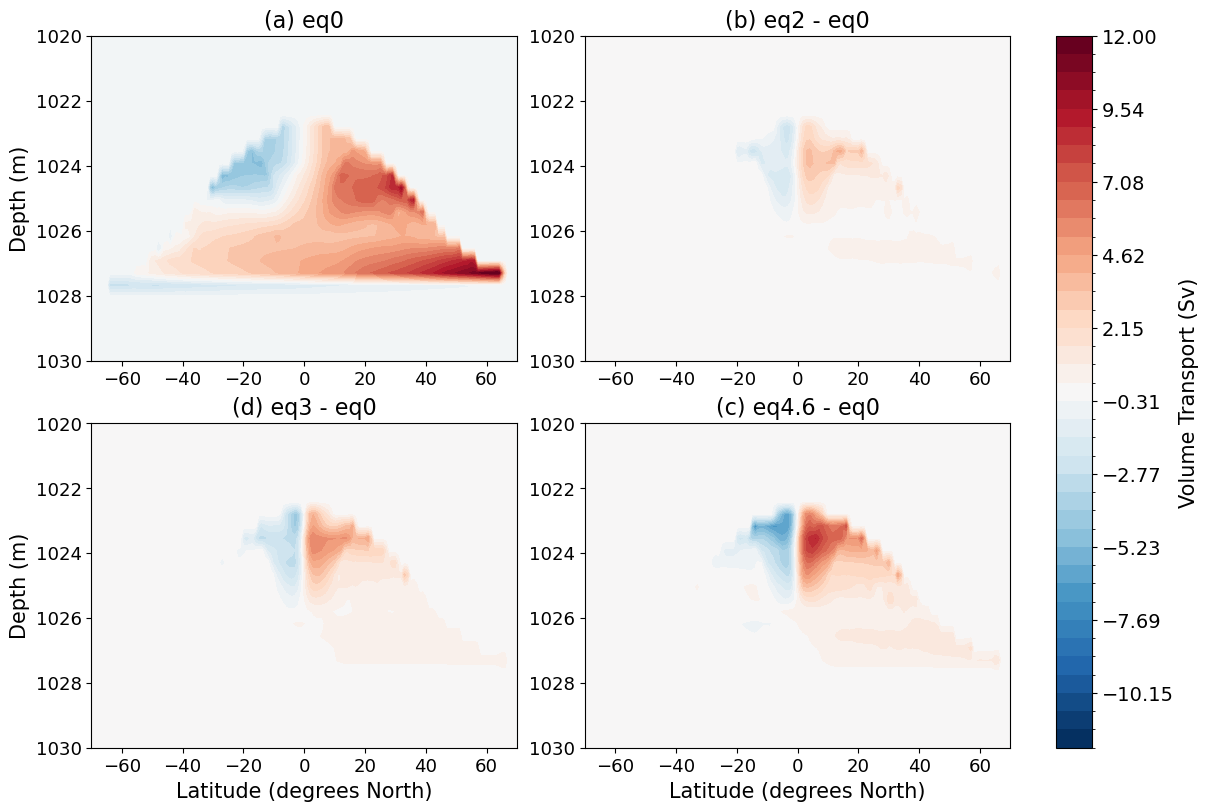

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

# Plot data
contour0 = (((ds_eq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contourf(
    ax=ax[0, 0], levels=40, cmap='RdBu_r',add_colorbar=False, vmax=12
)
contour1 = ((((ds_eq2_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_eq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[0, 1], levels=40, cmap='RdBu_r', add_colorbar=False, vmax=12
)
contour2 = ((((ds_eq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_eq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[1, 0], levels=40, cmap='RdBu_r', add_colorbar=False, vmax=12
)
contour3 = ((((ds_curl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_eq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[1, 1], levels=40, cmap='RdBu_r',add_colorbar=False, vmax=12
)

contours=[contour0,contour1,contour2,contour3]

# Set titles
ax[0, 0].set_title("(a) eq0", fontsize =16)
ax[0, 1].set_title("(b) eq2 - eq0", fontsize =16)
ax[1, 1].set_title("(c) eq4.6 - eq0", fontsize =16)
ax[1, 0].set_title("(d) eq3 - eq0", fontsize =16)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Depth (m)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Depth (m)", fontsize = 15)
ax[1,1].set_ylabel('')

# Invert y-axes
ax[0, 0].invert_yaxis()
ax[1, 0].invert_yaxis()
ax[0, 1].invert_yaxis()
ax[1, 1].invert_yaxis()

ax[0, 0].set_ylim(1030,1020)
ax[1, 0].set_ylim(1030,1020)
ax[0, 1].set_ylim(1030,1020)
ax[1, 1].set_ylim(1030,1020)

# ax[0, 0].axvline(x=42.5)
# ax[0, 1].axvline(x=42.5)
# ax[1, 0].axvline(x=42.5)
# ax[1, 1].axvline(x=42.5)

# Add a common colorbar
cbar = fig.colorbar(contours[3], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('Volume Transport (Sv)', fontsize=15)  # Set the colorbar title

plt.savefig('eq_densstream.png')
plt.show()

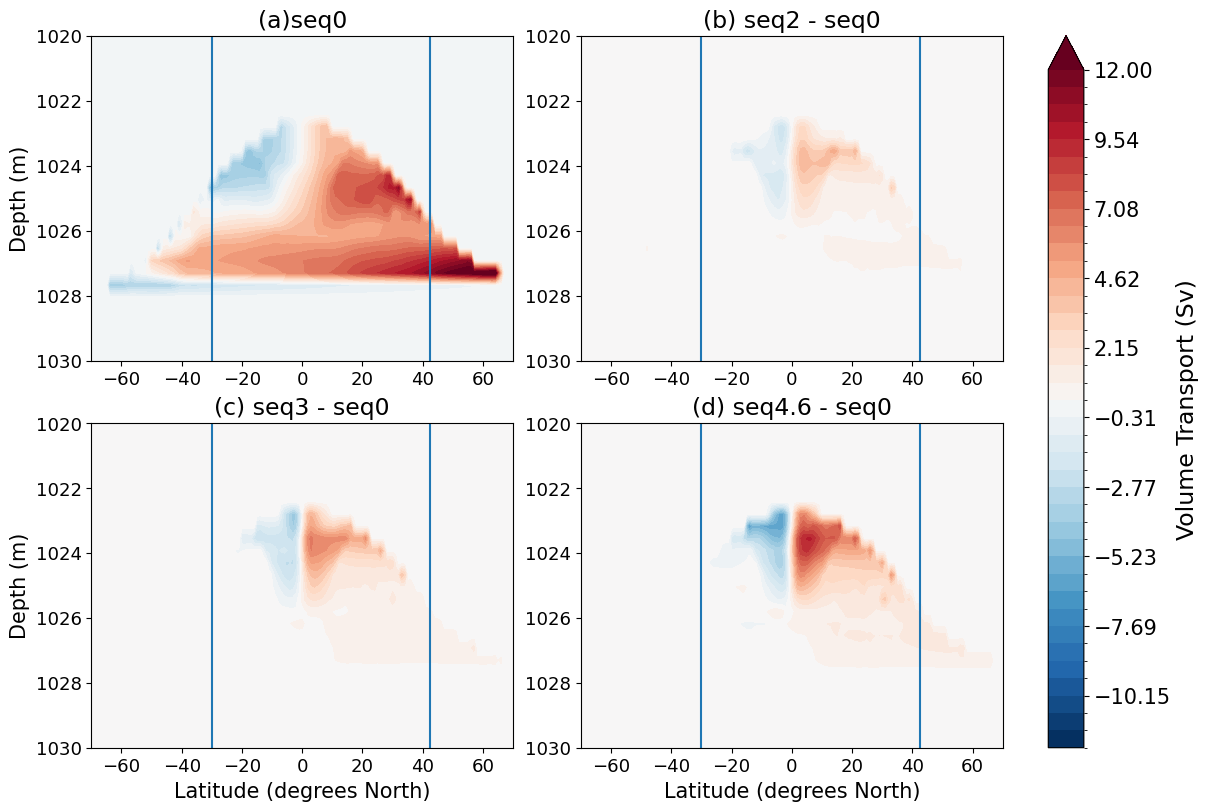

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

# Plot data
contour0 = (((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9).plot.contourf(
    ax=ax[0, 0], levels=40, cmap='RdBu_r',add_colorbar=False, vmax=12
)
contour1 = ((((ds_seq2_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[0, 1], levels=40, cmap='RdBu_r', add_colorbar=False, vmax=12
)
contour2 = ((((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[1, 0], levels=40, cmap='RdBu_r', add_colorbar=False, vmax=12
)
contour3 = ((((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9) - (((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l')) * 10**-9)).plot.contourf(
    ax=ax[1, 1], levels=40, cmap='RdBu_r',add_colorbar=False, vmax=12
)

contours=[contour0,contour1,contour2,contour3]

# Set titles
ax[0, 0].set_title("(a)seq0", fontsize =17)
ax[0, 1].set_title("(b) seq2 - seq0", fontsize =17)
ax[1, 1].set_title("(d) seq4.6 - seq0", fontsize =17)
ax[1, 0].set_title("(c) seq3 - seq0", fontsize =17)

ax[0,0].tick_params(axis='both', labelsize=13)
ax[0,1].tick_params(axis='both', labelsize=13)
ax[1,0].tick_params(axis='both', labelsize=13)
ax[1,1].tick_params(axis='both', labelsize=13)

ax[0,0].set_xlabel('')
ax[0,1].set_xlabel('')
ax[1,0].set_xlabel("Latitude (degrees North)", fontsize = 15)
ax[1,1].set_xlabel("Latitude (degrees North)", fontsize = 15)


ax[0,0].set_ylabel("Depth (m)", fontsize = 15)
ax[0,1].set_ylabel('')
ax[1,0].set_ylabel("Depth (m)", fontsize = 15)
ax[1,1].set_ylabel('')

# Invert y-axes
ax[0, 0].invert_yaxis()
ax[1, 0].invert_yaxis()
ax[0, 1].invert_yaxis()
ax[1, 1].invert_yaxis()

ax[0, 0].set_ylim(1030,1020)
ax[1, 0].set_ylim(1030,1020)
ax[0, 1].set_ylim(1030,1020)
ax[1, 1].set_ylim(1030,1020)

ax[0, 0].axvline(x=42.5)
ax[0, 1].axvline(x=42.5)
ax[1, 0].axvline(x=42.5)
ax[1, 1].axvline(x=42.5)

ax[0, 0].axvline(x=-30)
ax[0, 1].axvline(x=-30)
ax[1, 0].axvline(x=-30)
ax[1, 1].axvline(x=-30)

# Add a common colorbar
cbar = fig.colorbar(contours[0], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=15)
cbar.set_label('Volume Transport (Sv)', fontsize=17)  # Set the colorbar title

# plt.show()
plt.savefig('densdif.png',dpi=200)

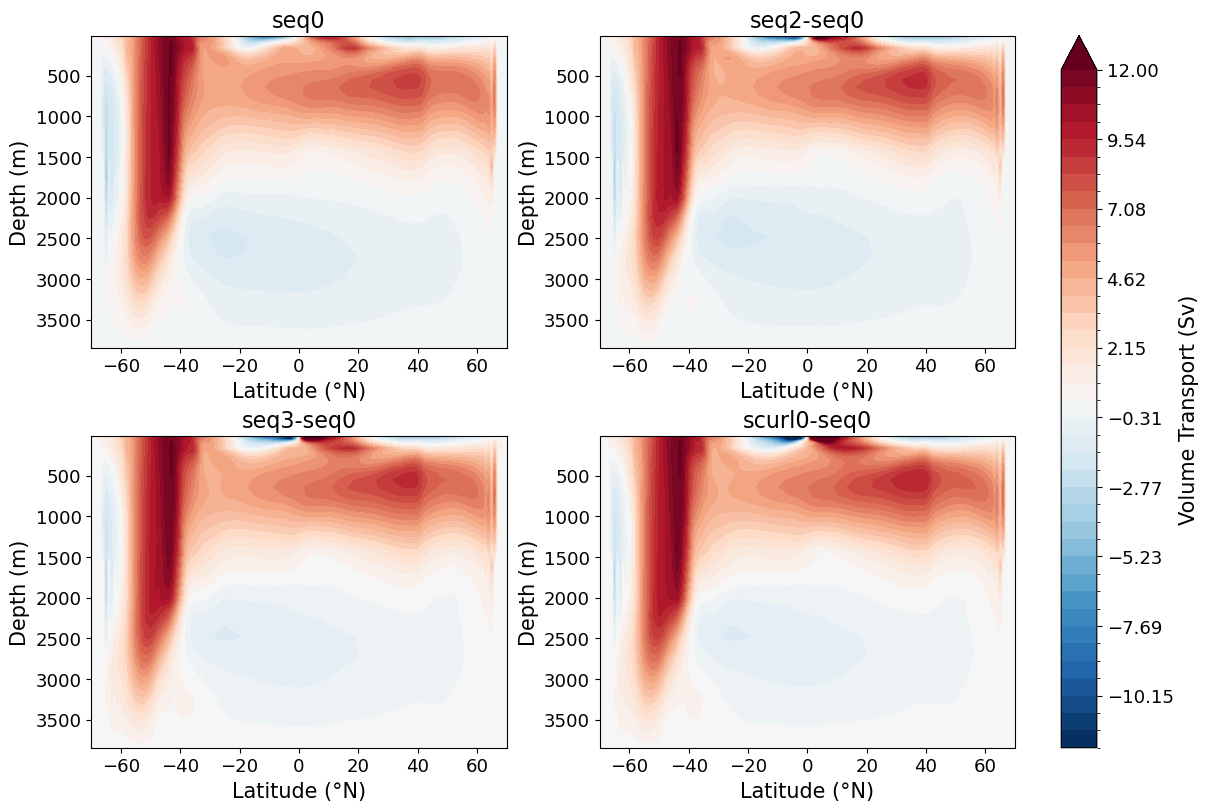

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=2, constrained_layout=True, figsize=(12, 8))

# Define datasets for easier plotting
datasets = [ds_seq0_prog, ds_seqw_prog, ds_seq3_prog, ds_scurl0_prog]
titles = ["seq0", "seq2-seq0", "seq3-seq0", "scurl0-seq0"]

# Loop through axes and datasets
contours = []  # List to hold contour plots for colorbar
for i, axis in enumerate(ax.flat):
    contour = (((datasets[i].vh.isel(Time=-1)).sum('xh').cumsum('zl')) * 10**-6).plot.contourf(
        ax=axis, levels=40, cmap='RdBu_r', vmax=12, add_colorbar=False
    )
    contours.append(contour)  # Add contour to the list
    axis.set_title(titles[i], fontsize=16)
    axis.set_xlabel('Latitude (°N)', fontsize=15)
    axis.set_ylabel('Depth (m)', fontsize=15)
    axis.tick_params(axis='both', labelsize=13)
    axis.invert_yaxis()

# Add a single colorbar on the extreme right
cbar = fig.colorbar(contours[0], ax=ax, orientation='vertical')
cbar.ax.tick_params(labelsize=13)
cbar.set_label('Volume Transport (Sv)', fontsize=15)  # Set the colorbar title

plt.show()


(1030.0, 1020.0)

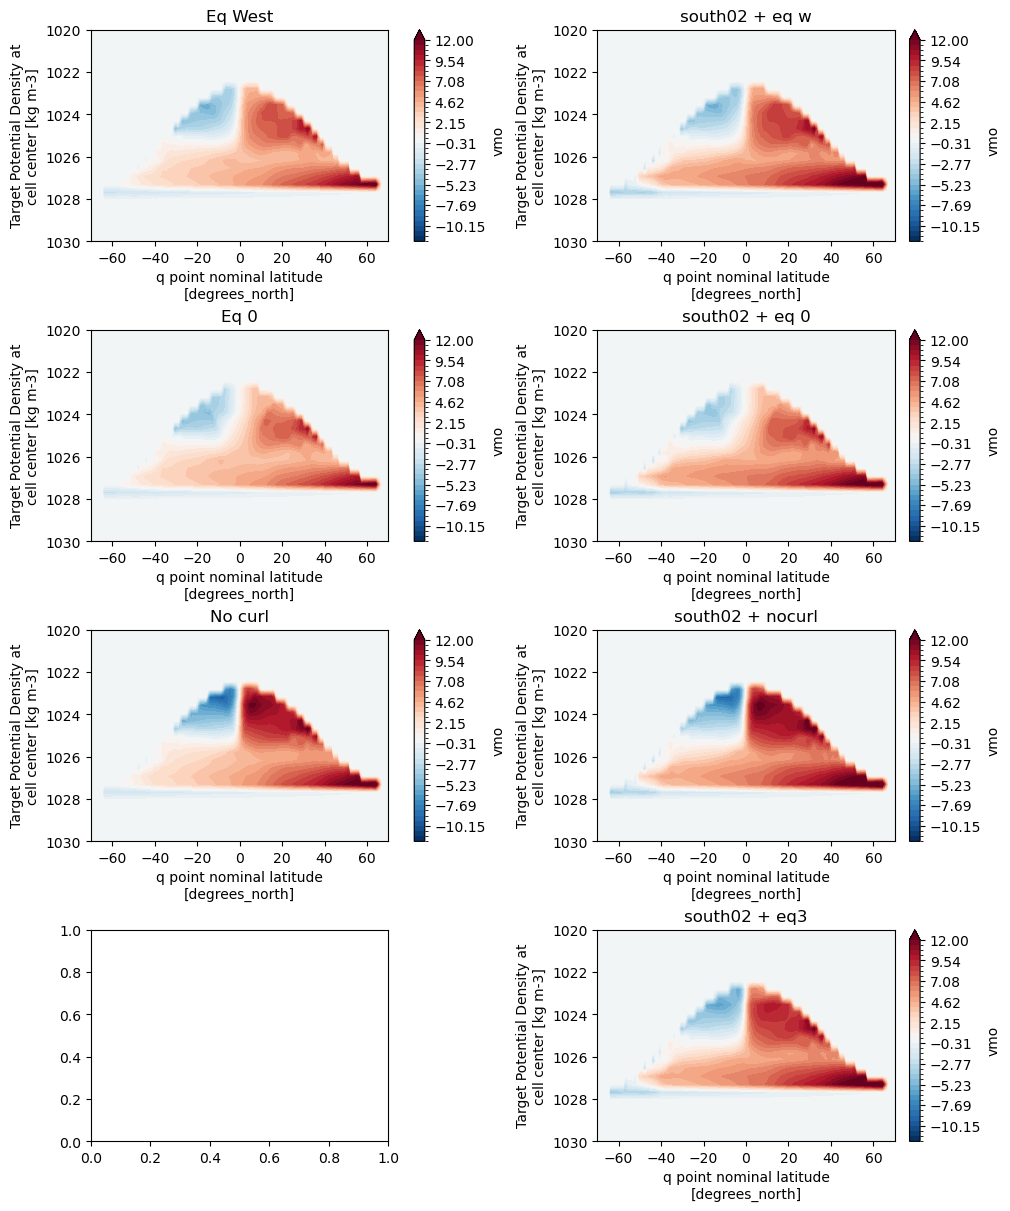

In [20]:
fig,ax=plt.subplots(nrows=4,ncols=2, constrained_layout=True,figsize=(10,12))
(((ds_eqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).plot.contourf(ax=ax[0,0],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_eq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).plot.contourf(ax=ax[1,0],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_curl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).plot.contourf(ax=ax[2,0],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_seqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).plot.contourf(ax=ax[0,1],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).plot.contourf(ax=ax[1,1],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).plot.contourf(ax=ax[2,1],levels=40,cmap = 'RdBu_r',vmax=12)
(((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).plot.contourf(ax=ax[3,1],levels=40,cmap = 'RdBu_r',vmax=12)

ax[0,0].set_title("Eq West")
ax[1,0].set_title("Eq 0")
ax[2,0].set_title("No curl")
ax[0,1].set_title("south02 + eq w")
ax[1,1].set_title("south02 + eq 0")
ax[2,1].set_title("south02 + nocurl")
ax[3,1].set_title("south02 + eq3")

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[2,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()
ax[2,1].invert_yaxis()
ax[3,1].invert_yaxis()

ax[0,0].set_ylim(1030,1020)
ax[1,0].set_ylim(1030,1020)
ax[2,0].set_ylim(1030,1020)
ax[0,1].set_ylim(1030,1020)
ax[1,1].set_ylim(1030,1020)
ax[2,1].set_ylim(1030,1020)
ax[3,1].set_ylim(1030,1020)

(1030.0, 1020.0)

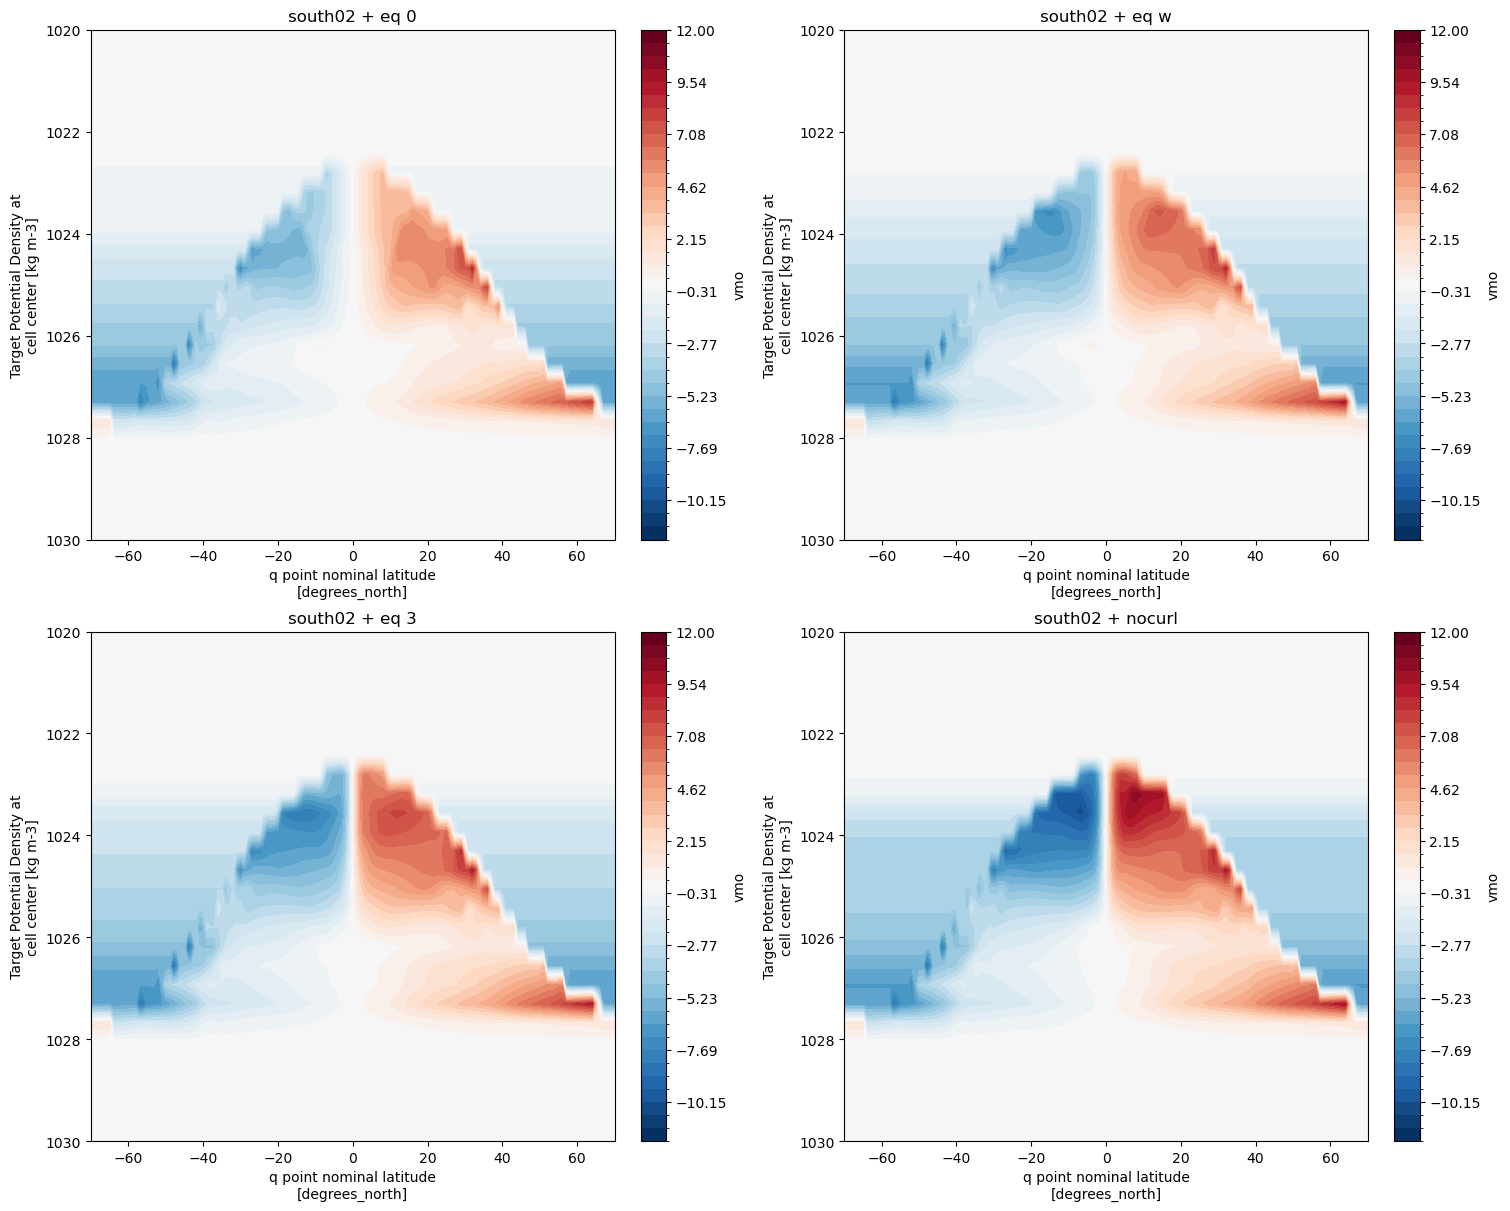

In [21]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(15,12))
((((ds_seqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9) - (((ds_seqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70)).plot.contourf(ax=ax[0,1],levels=40,cmap = 'RdBu_r',vmax=12)
((((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9) - (((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70)).plot.contourf(ax=ax[0,0],levels=40,cmap = 'RdBu_r',vmax=12)
((((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9) - (((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70)).plot.contourf(ax=ax[1,0],levels=40,cmap = 'RdBu_r',vmax=12)
((((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9) - (((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70)).plot.contourf(ax=ax[1,1],levels=40,cmap = 'RdBu_r',vmax=12)

ax[0,0].set_title("south02 + eq 0")
ax[0,1].set_title("south02 + eq w")
ax[1,1].set_title("south02 + nocurl")
ax[1,0].set_title("south02 + eq 3")

ax[0,0].invert_yaxis()
ax[1,0].invert_yaxis()
ax[0,1].invert_yaxis()
ax[1,1].invert_yaxis()

ax[0,0].set_ylim(1030,1020)
ax[1,0].set_ylim(1030,1020)
ax[0,1].set_ylim(1030,1020)
ax[1,1].set_ylim(1030,1020)


(1020.0, 1030.0)

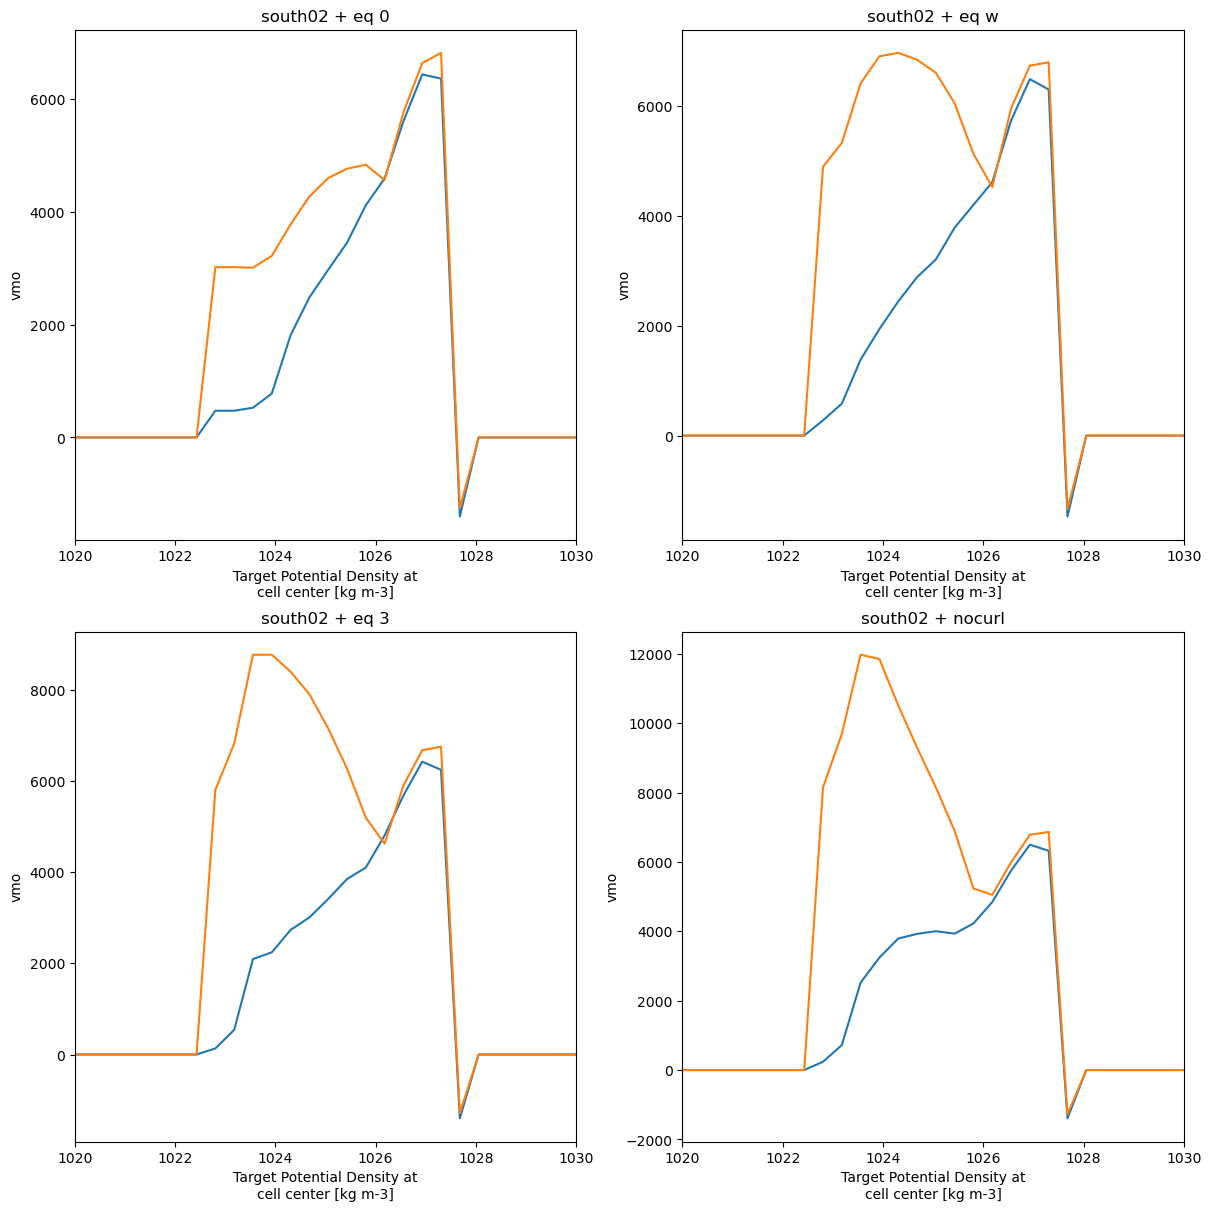

In [22]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,12))
(((ds_seqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=70).plot(ax=ax[0,1])
(((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=70).plot(ax=ax[0,0])
(((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=70).plot(ax=ax[1,1])
(((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=70).plot(ax=ax[1,0])
(((ds_seqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=75).plot(ax=ax[0,1])
(((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=75).plot(ax=ax[0,0])
(((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=75).plot(ax=ax[1,1])
(((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=75).plot(ax=ax[1,0])

ax[0,0].set_title("south02 + eq 0")
ax[0,1].set_title("south02 + eq w")
ax[1,1].set_title("south02 + nocurl")
ax[1,0].set_title("south02 + eq 3")


ax[0,0].set_xlim(1020,1030)
ax[1,0].set_xlim(1020,1030)
ax[0,1].set_xlim(1020,1030)
ax[1,1].set_xlim(1020,1030)

(1020.0, 1030.0)

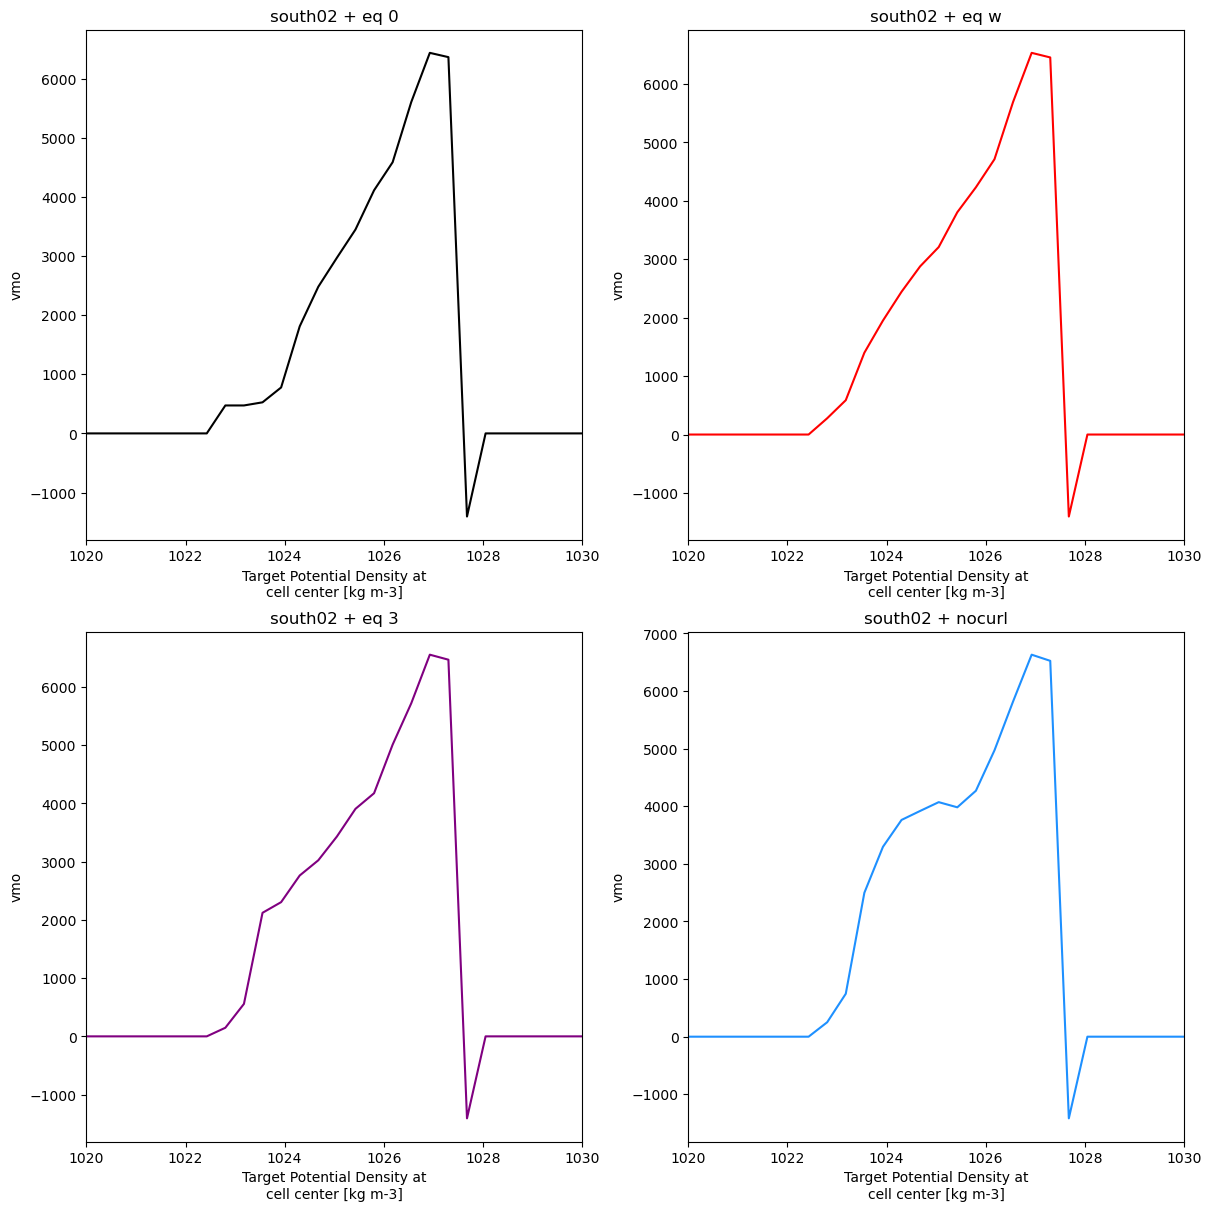

In [4]:
fig,ax=plt.subplots(nrows=2,ncols=2, constrained_layout=True,figsize=(12,12))
(((ds_seq2_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=70).plot(ax=ax[0,1], label = "seq2", color = "red")
(((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=70).plot(ax=ax[0,0], label = "seq0", color = "black")
(((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=70).plot(ax=ax[1,1], label = "seq3", color = "dodgerblue")
(((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-6).isel(yq=70).plot(ax=ax[1,0], label = "scurl0", color = "purple")

ax[0,0].set_title("south02 + eq 0")
ax[0,1].set_title("south02 + eq w")
ax[1,1].set_title("south02 + nocurl")
ax[1,0].set_title("south02 + eq 3")


ax[0,0].set_xlim(1020,1030)
ax[1,0].set_xlim(1020,1030)
ax[0,1].set_xlim(1020,1030)
ax[1,1].set_xlim(1020,1030)

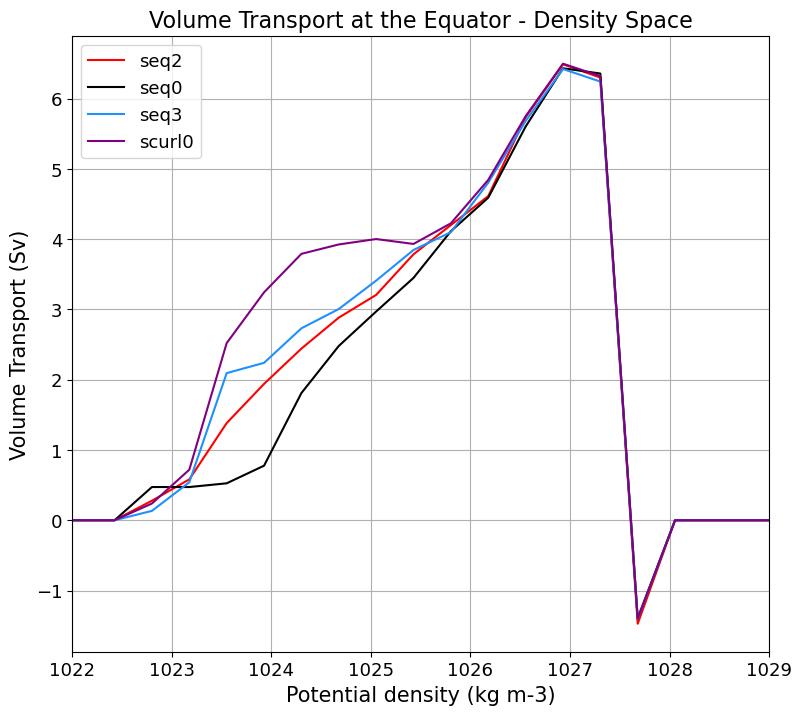

In [24]:
plt.figure(figsize=(9,8))

(((ds_seqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(label = "seq2", color = "red")
(((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(label = "seq0", color = "black")
(((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(label = "seq3", color = "dodgerblue")
(((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(label = "scurl0", color = "purple")

plt.title('Volume Transport at the Equator - Density Space', fontsize=16)
plt.xlabel('Potential density (kg m-3)', fontsize=15)
plt.ylabel('Volume Transport (Sv)', fontsize=15)

# Increase tick label size
plt.tick_params(axis='both', labelsize=13)
plt.gca().set_xlim(1022,1029)
plt.legend(loc="upper left",fontsize=13)
plt.grid()


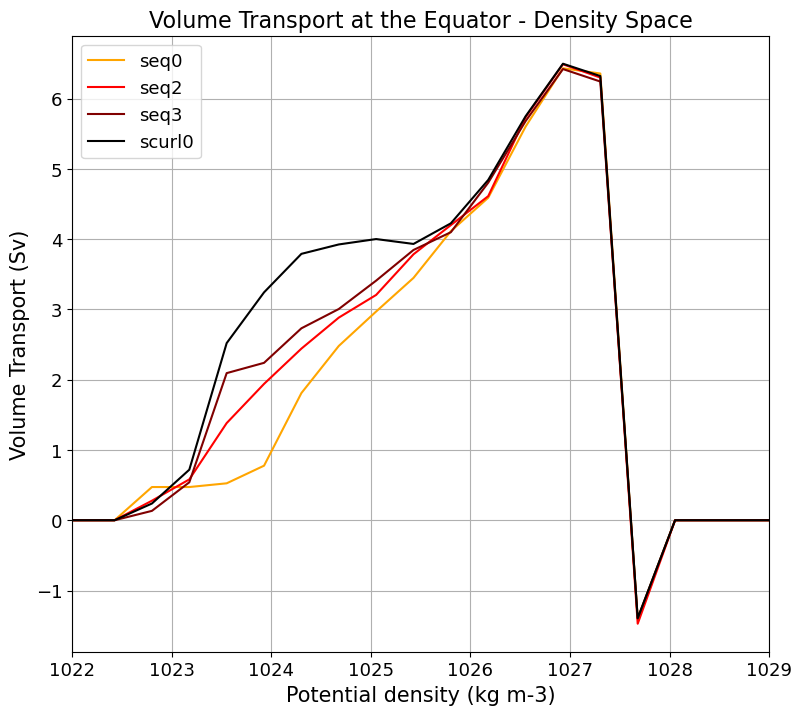

In [25]:
plt.figure(figsize=(9,8))
(((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(label = "seq0", color = "orange")
(((ds_seqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(label = "seq2", color = "red")
(((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(label = "seq3", color = "maroon")
(((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(label = "scurl0", color = "black")

plt.title('Volume Transport at the Equator - Density Space', fontsize=16)
plt.xlabel('Potential density (kg m-3)', fontsize=15)
plt.ylabel('Volume Transport (Sv)', fontsize=15)

# Increase tick label size
plt.tick_params(axis='both', labelsize=13)
plt.gca().set_xlim(1022,1029)
plt.legend(loc="upper left",fontsize=13)
plt.grid()


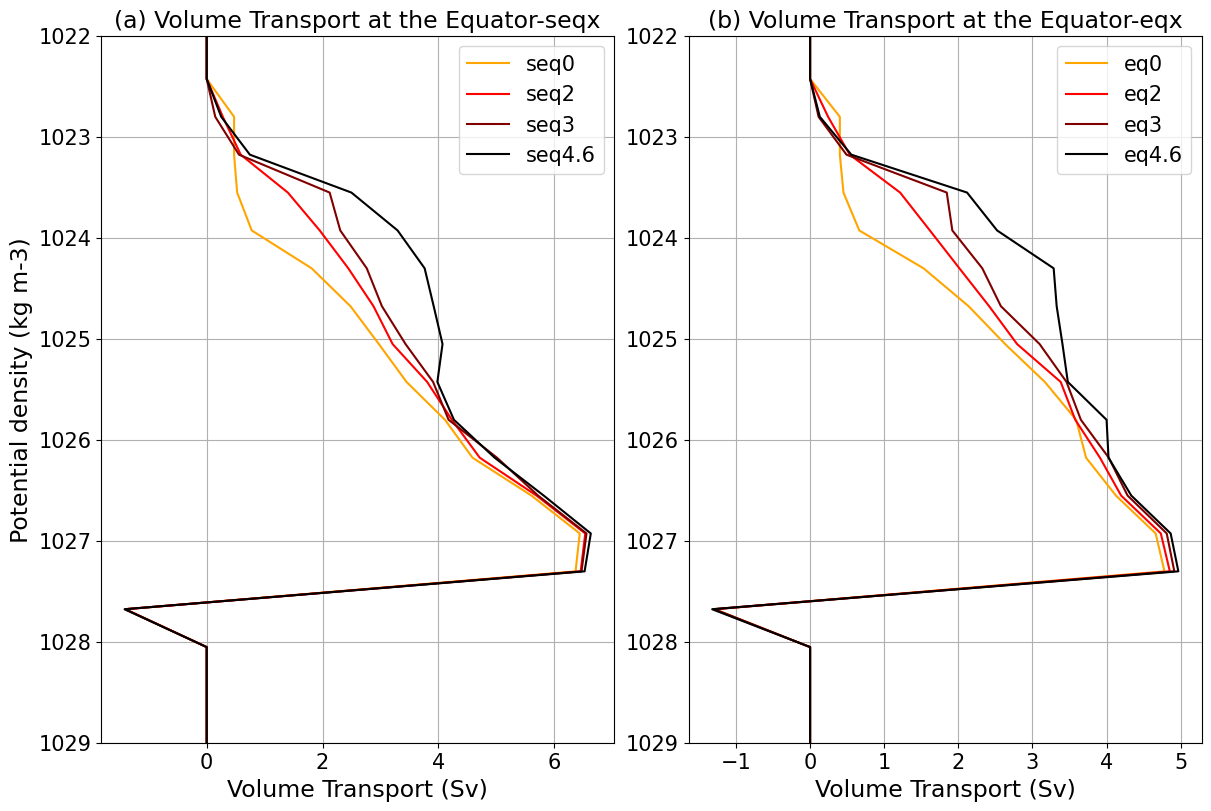

In [15]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,8))
(((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq0", color = "orange", ax=ax[0])
(((ds_seq2_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq2", color = "red", ax=ax[0])
(((ds_seq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq3", color = "maroon", ax=ax[0])
(((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq4.6", color = "black", ax=ax[0])

(((ds_eq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "eq0", color = "orange", ax=ax[1])
(((ds_eq2_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "eq2", color = "red", ax=ax[1])
(((ds_eq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "eq3", color = "maroon", ax=ax[1])
(((ds_curl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "eq4.6", color = "black", ax=ax[1])

ax[0].set_title('(a) Volume Transport at the Equator-seqx', fontsize=17)
ax[0].set_ylabel('Potential density (kg m-3)', fontsize=17)
ax[0].set_xlabel('Volume Transport (Sv)', fontsize=17)

ax[1].set_title('(b) Volume Transport at the Equator-eqx', fontsize=17)
ax[1].set_ylabel('', fontsize=17)
ax[1].set_xlabel('Volume Transport (Sv)', fontsize=17)

# Increase tick label size
ax[0].tick_params(axis='both', labelsize=15)
ax[0].set_ylim(1022,1029)
ax[0].legend(loc="upper right",fontsize=15)
ax[0].grid()
ax[0].invert_yaxis()


ax[1].tick_params(axis='both', labelsize=15)
ax[1].set_ylim(1022,1029)
ax[1].legend(loc="upper right",fontsize=15)
ax[1].grid()
ax[1].invert_yaxis()


plt.savefig('volumeateq.png')

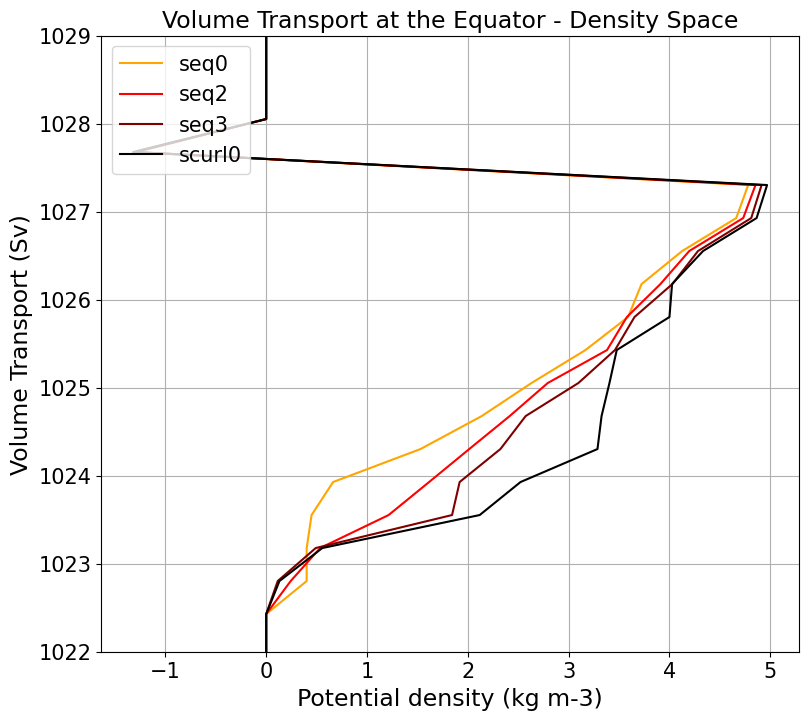

In [8]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,8))
(((ds_eq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq0", color = "orange", ax=ax0)
(((ds_eq2_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq2", color = "red")
(((ds_eq3_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "seq3", color = "maroon")
(((ds_curl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*10**-9).isel(yq=70).plot(y='rho2_l',label = "scurl0", color = "black")

plt.title('Volume Transport at the Equator - Density Space', fontsize=17)
plt.xlabel('Potential density (kg m-3)', fontsize=17)
plt.ylabel('Volume Transport (Sv)', fontsize=17)

# Increase tick label size
plt.tick_params(axis='both', labelsize=15)
plt.gca().set_ylim(1022,1029)
plt.legend(loc="upper left",fontsize=15)
plt.grid()

# South 01 winds

Text(0.5, 1.0, 'curl0-eq0')

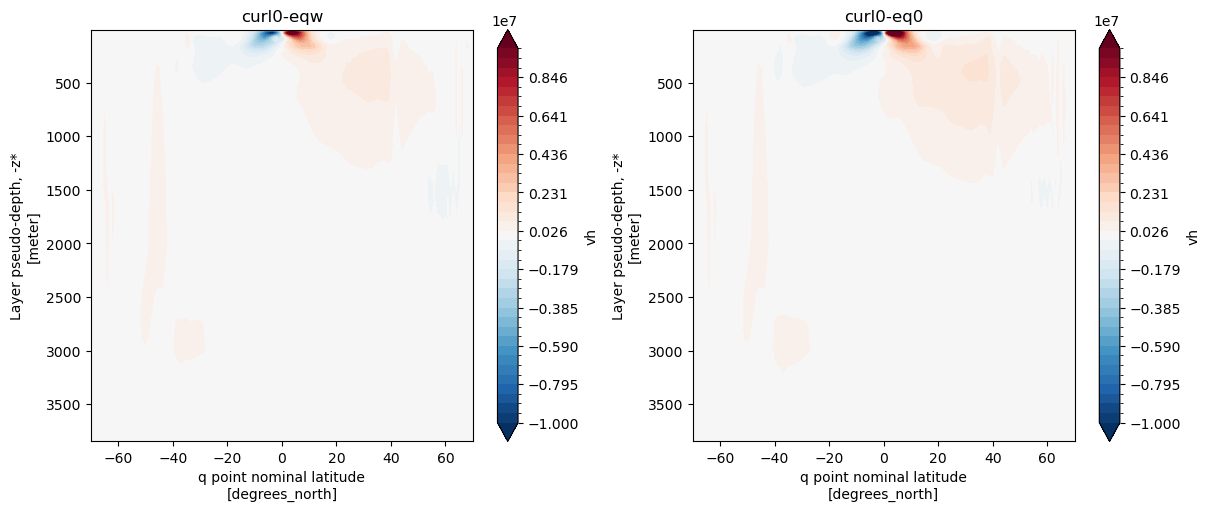

In [26]:
cp = np.linspace(-1.5,1.5,30)
cps = np.linspace(-9,9,20)
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,5))
(-((ds_eqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))+((ds_curl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))).plot.contourf(ax=ax[0],levels=40,cmap = 'RdBu_r', vmax=10*10**6)
(-((ds_eq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))+((ds_curl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))).plot.contourf(ax=ax[1],levels=40,cmap = 'RdBu_r',vmax=10*10**6)
ax[0].invert_yaxis()
ax[0].set_title("curl0-eqw")
#ax[0].set_ylim(600,0)
ax[1].invert_yaxis()
ax[1].set_title("curl0-eq0")
#ax[1].set_ylim(600,0)

(600.0, 0.0)

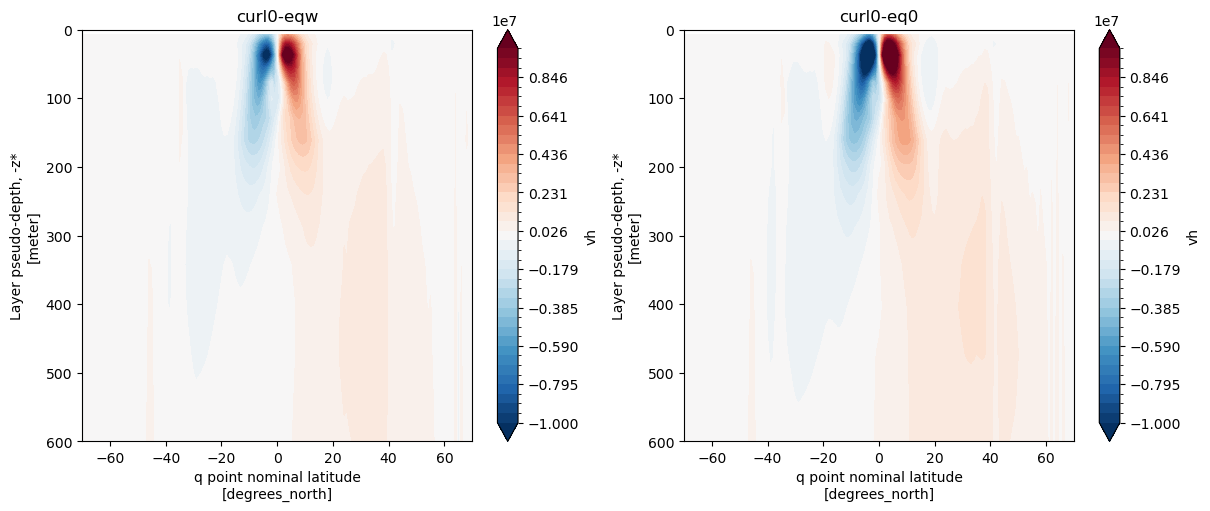

In [27]:
cp = np.linspace(-1.5,1.5,30)
cps = np.linspace(-9,9,20)
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,5))
(-((ds_eqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))+((ds_curl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))).plot.contourf(ax=ax[0],levels=40,cmap = 'RdBu_r', vmax=10*10**6)
(-((ds_eq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))+((ds_curl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))).plot.contourf(ax=ax[1],levels=40,cmap = 'RdBu_r',vmax=10*10**6)
ax[0].invert_yaxis()
ax[0].set_title("curl0-eqw")
ax[0].set_ylim(600,0)
ax[1].invert_yaxis()
ax[1].set_title("curl0-eq0")
ax[1].set_ylim(600,0)

# South 02 winds

Text(0.5, 1.0, 'south + (curl0-eq0)')

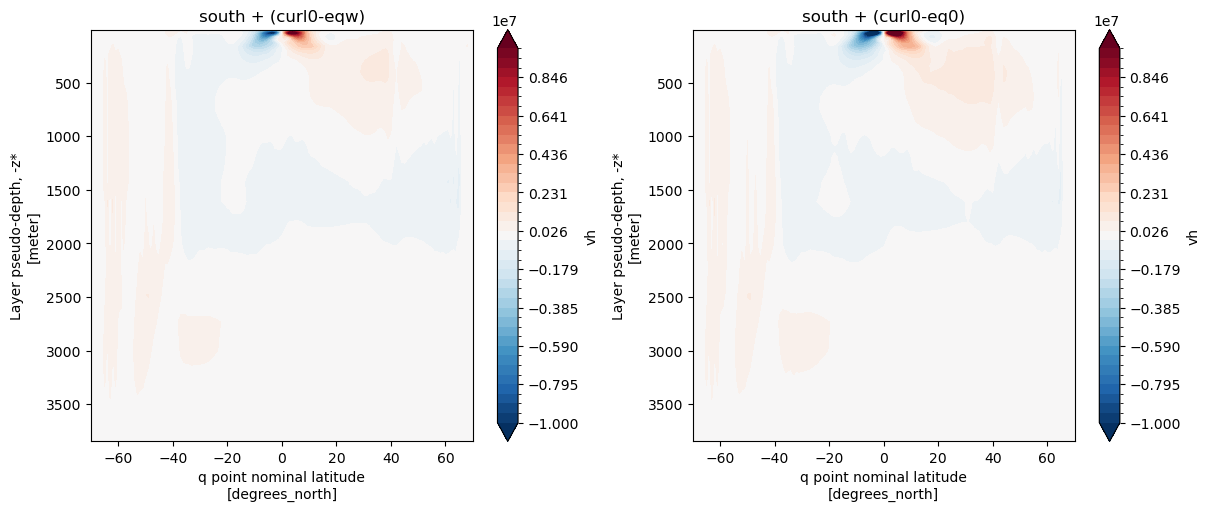

In [28]:
cp = np.linspace(-1.5,1.5,30)
cps = np.linspace(-9,9,20)
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,5))
(-((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))+((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))).plot.contourf(ax=ax[0],levels=40,cmap = 'RdBu_r', vmax=10*10**6)
(-((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))+((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))).plot.contourf(ax=ax[1],levels=40,cmap = 'RdBu_r',vmax=10*10**6)
ax[0].invert_yaxis()
ax[0].set_title("south + (curl0-eqw)")
#ax[0].set_ylim(600,0)
ax[1].invert_yaxis()
ax[1].set_title("south + (curl0-eq0)")
#ax[1].set_ylim(600,0)

(600.0, 0.0)

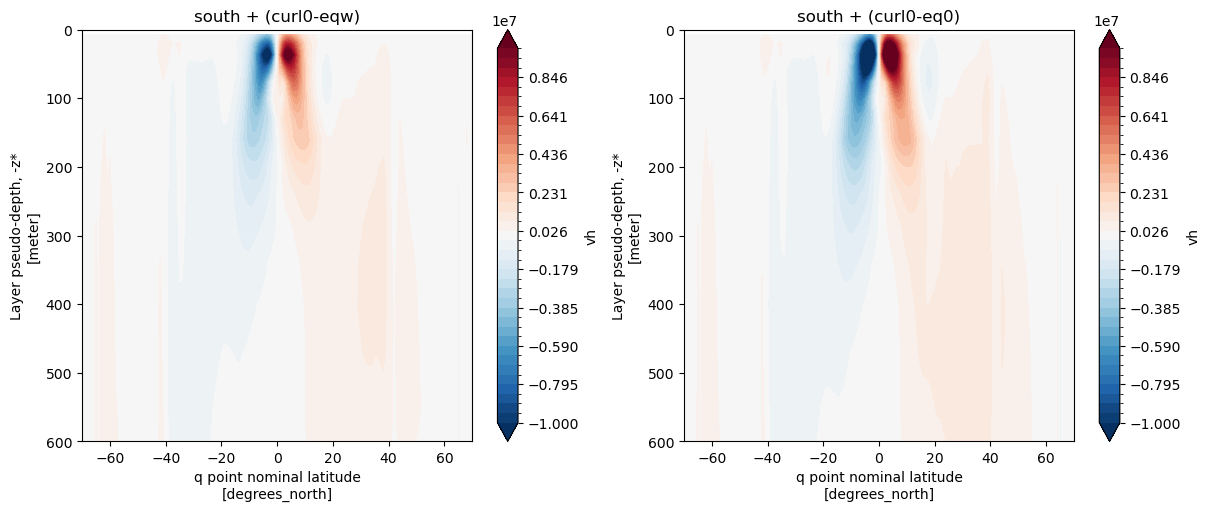

In [29]:
cp = np.linspace(-1.5,1.5,30)
cps = np.linspace(-9,9,20)
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,5))
(-((ds_seqw_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))+((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))).plot.contourf(ax=ax[0],levels=40,cmap = 'RdBu_r', vmax=10*10**6)
(-((ds_seq0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))+((ds_scurl0_prog.vh.isel(Time=-1)).sum('xh').cumsum('zl'))).plot.contourf(ax=ax[1],levels=40,cmap = 'RdBu_r',vmax=10*10**6)
ax[0].invert_yaxis()
ax[0].set_title("south + (curl0-eqw)")
ax[0].set_ylim(600,0)
ax[1].invert_yaxis()
ax[1].set_title("south + (curl0-eq0)")
ax[1].set_ylim(600,0)

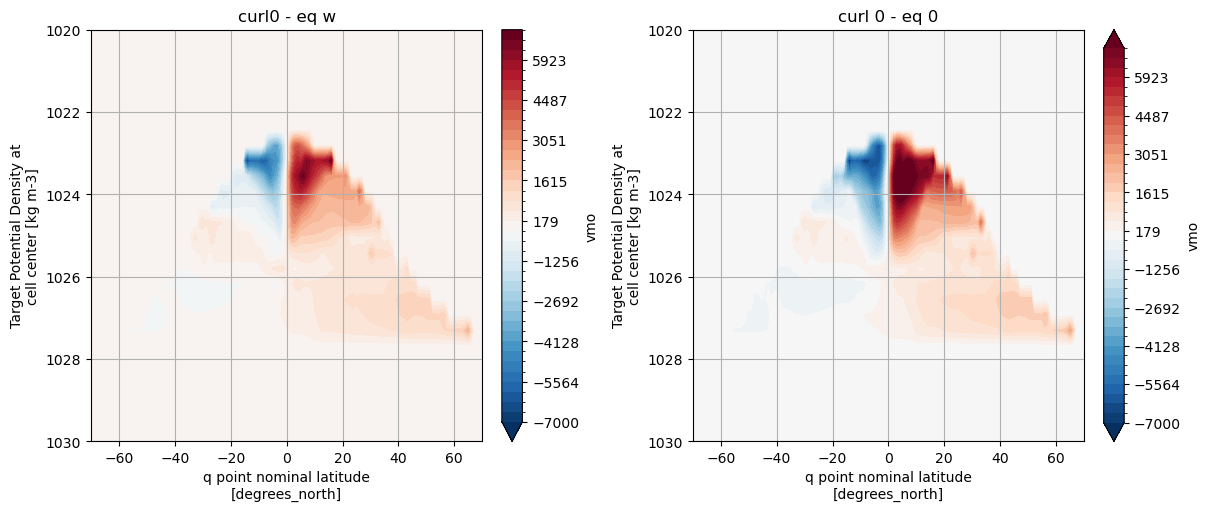

In [5]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,5))
(-((ds_eqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*((10 ** -6)) + ((ds_curl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*(10 ** -6)).plot.contourf(ax=ax[0],levels=40,cmap = 'RdBu_r', vmax= 7000)
(-((ds_eq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*((10 ** -6)) + ((ds_curl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*(10 ** -6)).plot.contourf(ax=ax[1],levels=40,cmap = 'RdBu_r', vmax=7000)
ax[0].invert_yaxis()
ax[0].set_title("curl0 - eq w")
ax[0].set_ylim(1030,1020)
ax[0].grid()
ax[1].invert_yaxis()
ax[1].set_title("curl 0 - eq 0")
ax[1].set_ylim(1030,1020)
ax[1].grid()

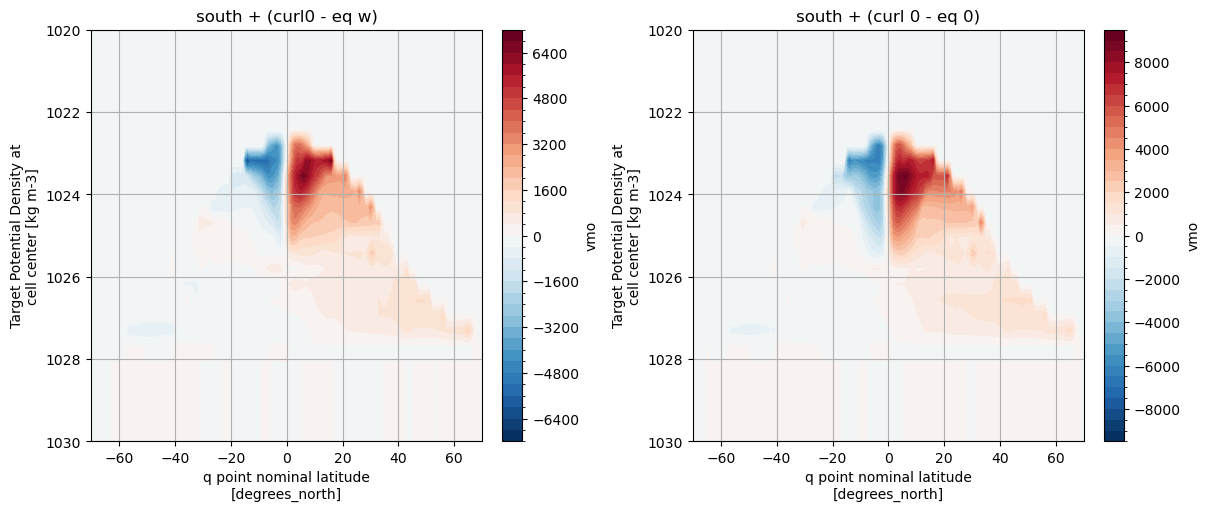

In [31]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,5))
(-((ds_seqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*((10 ** -6)) + ((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*(10 ** -6)).plot.contourf(ax=ax[0],levels=40,cmap = 'RdBu_r')
(-((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*((10 ** -6)) + ((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*(10 ** -6)).plot.contourf(ax=ax[1],levels=40,cmap = 'RdBu_r')
ax[0].invert_yaxis()
ax[0].set_title("south + (curl0 - eq w)")
ax[0].set_ylim(1030,1020)
ax[0].grid()
ax[1].invert_yaxis()
ax[1].set_title("south + (curl 0 - eq 0)")
ax[1].set_ylim(1030,1020)
ax[1].grid()

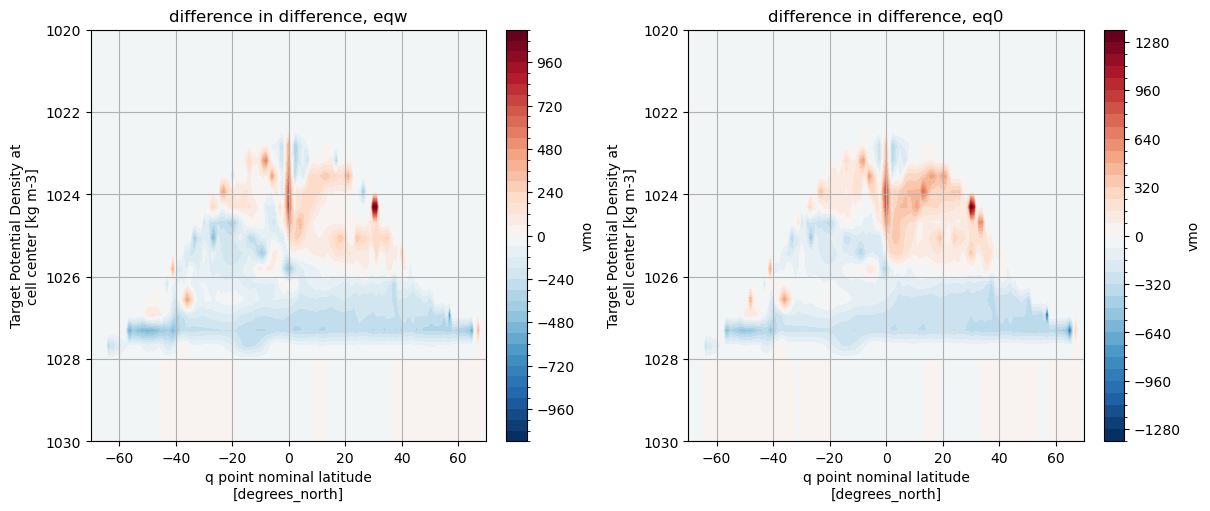

In [33]:
fig,ax=plt.subplots(nrows=1,ncols=2, constrained_layout=True,figsize=(12,5))
(-((ds_seqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*((10 ** -6)) + (((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*(10 ** -6)) - (((ds_curl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*(10 ** -6)) + (((ds_eqw_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*(10 ** -6))).plot.contourf(ax=ax[0],levels=40,cmap = 'RdBu_r')
(-((ds_seq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*((10 ** -6)) + (((ds_scurl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*(10 ** -6)) - (((ds_curl0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*(10 ** -6)) + (((ds_eq0_cont.vmo.isel(Time=-1)).sum('xh').cumsum('rho2_l'))*(10 ** -6))).plot.contourf(ax=ax[1],levels=40,cmap = 'RdBu_r')
ax[0].invert_yaxis()
ax[0].set_title("difference in difference, eqw")
ax[0].set_ylim(1030,1020)
ax[0].grid()
ax[1].invert_yaxis()
ax[1].set_title("difference in difference, eq0")
ax[1].set_ylim(1030,1020)
ax[1].grid()